# TimeScale

In [1]:
# %matplotlib inline #特殊点用了%， 这说明作者用的jupyter notebook 在写代码；放在其他地方运行可能就不成功会报错
from xmitgcm import open_mdsdataset #按照这个xmitgcm 的库很方便
import xgcm
import xarray as xr
import matplotlib.pyplot as plt
from xlayers import finegrid, layers
from xlayers.core import layers_apply
import numpy as np
import os

In [2]:
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na_ex3/"
ds1 = open_mdsdataset(data_dir,prefix={'tracer'}).chunk()
TRACE = ds1.TRAC01
TRACE

<xarray.DataArray 'TRAC01' (time: 104, Z: 30, YC: 144, XC: 240)>
dask.array<concatenate, shape=(104, 30, 144, 240), dtype=float32, chunksize=(1, 30, 144, 240), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) >f4 0.5 1.5 2.5 3.5 4.5 5.5 ... 235.5 236.5 237.5 238.5 239.5
  * YC       (YC) >f4 -71.5 -70.5 -69.5 -68.5 -67.5 ... 67.5 68.5 69.5 70.5 71.5
  * Z        (Z) >f4 -10.0 -30.0 -50.0 ... -3.375e+03 -3.625e+03 -3.875e+03
    rA       (YC, XC) >f4 dask.array<chunksize=(144, 240), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(144, 240), meta=np.ndarray>
    drF      (Z) >f4 dask.array<chunksize=(30,), meta=np.ndarray>
    PHrefC   (Z) >f4 dask.array<chunksize=(30,), meta=np.ndarray>
    hFacC    (Z, YC, XC) >f4 dask.array<chunksize=(30, 144, 240), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(30, 144, 240), meta=np.ndarray>
    rhoRef   (Z) >f4 dask.array<chunksize=(30,), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 0 days 2 days 4 days ... 204 days 206 days
Attributes:
    standard_name:  TRAC01
    long_name:      Tracer 0001 concentration
    units:          kg/kg

In [6]:
#READ SURFACE TRACER of the deep Atlantic ocean
# T=3
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na_ex3/"
ds1 = open_mdsdataset(data_dir,prefix={'tracer'}).chunk()
tracer3 = ds1.TRAC01[0:100,0,42,:] 
# T= 2
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na_ex2/"
ds1 = open_mdsdataset(data_dir,prefix={'tracer'}).chunk()
tracer2 = ds1.TRAC01[0:100,0,42,:]
# T=1
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na/"
ds1 = open_mdsdataset(data_dir,prefix={'tracer'}).chunk()
tracer1 = ds1.TRAC01[0:100,0,42,:]
tracer1

<xarray.DataArray 'TRAC01' (time: 100, XC: 240)>
dask.array<getitem, shape=(100, 240), dtype=float32, chunksize=(1, 240), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) >f4 0.5 1.5 2.5 3.5 4.5 5.5 ... 235.5 236.5 237.5 238.5 239.5
    YC       >f4 -29.5
    Z        >f4 -10.0
    rA       (XC) >f4 dask.array<chunksize=(240,), meta=np.ndarray>
    Depth    (XC) >f4 dask.array<chunksize=(240,), meta=np.ndarray>
    drF      >f4 dask.array<chunksize=(), meta=np.ndarray>
    PHrefC   >f4 dask.array<chunksize=(), meta=np.ndarray>
    hFacC    (XC) >f4 dask.array<chunksize=(240,), meta=np.ndarray>
    maskC    (XC) bool dask.array<chunksize=(240,), meta=np.ndarray>
    rhoRef   >f4 dask.array<chunksize=(), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 0 days 2 days 4 days ... 196 days 198 days
Attributes:
    standard_name:  TRAC01
    long_name:      Tracer 0001 concentration
    units:          kg/kg

/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


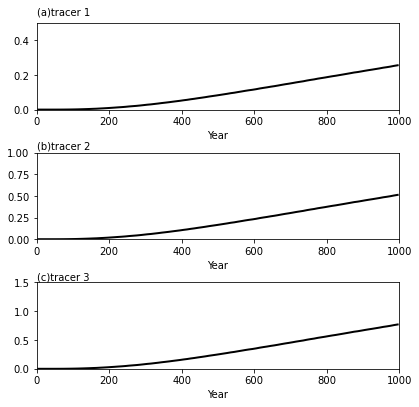

In [9]:
# time seriers
fig1 = plt.figure(figsize=(12, 6))
ax1=fig1.add_axes([0.1,0.7,0.42,0.2]) #左、底、宽、高
ax2=fig1.add_axes([0.1,0.4,0.42,0.2]) #左、底、宽、高
ax3=fig1.add_axes([0.1,0.1,0.42,0.2]) #左、底、宽、高

t1 = tracer1.mean('XC')
t2 = tracer2.mean('XC')
t3 = tracer3.mean('XC')

yy = np.arange(0.5, 100, 1)
ax1.plot(yy,t1, 'k-', linewidth=2, label='W0')
ax2.plot(yy,t2, 'k-', linewidth=2, label='W0')
ax3.plot(yy,t3, 'k-', linewidth=2, label='W0')

ax1.set_ylim(0,0.5)
ax2.set_ylim(0,1.)
ax3.set_ylim(0,1.5)

ax1.set_xlim(0,100)
ax2.set_xlim(0,100)
ax3.set_xlim(0,100)

ax1.set_xticklabels(np.arange(0, 121, 20))
ax1.set_xticklabels(np.arange(0, 1001, 200))
ax2.set_xticklabels(np.arange(0, 121, 20))
ax2.set_xticklabels(np.arange(0, 1001, 200))
ax3.set_xticklabels(np.arange(0, 121, 20))
ax3.set_xticklabels(np.arange(0, 1001, 200))

ax1.set_xlabel('Year')
ax2.set_xlabel('Year')
ax3.set_xlabel('Year')
# fig1.colorbar(h1,ax=ax1)
# fig1.colorbar(h2,ax=ax2)
# fig1.colorbar(h3,ax=ax3)

ax1.text(0, 0.55, '(a)tracer 1', size=10)
ax2.text(0, 1.05, '(b)tracer 2', size=10)
ax3.text(0, 1.55, '(c)tracer 3', size=10)

# plt.xlim(0, 240)

# x_ticks = np.arange(0, 240, 60)
# y_ticks = np.arange(10, 140, 30)
# ax1.set_yticks(y_ticks)
# ax1.set_yticklabels(['60S','30S','0','30N','60N'],fontsize=10)

fig1.savefig('MITgcm_timescale.pdf',format='pdf',dpi=300)#输出